In [27]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import set_config

set_config(display='diagram')

In [2]:
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.sort_values(by='total_bill',inplace=True)

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
182,45.35,3.50,Male,Yes,Sun,Dinner,3
156,48.17,5.00,Male,No,Sun,Dinner,6
59,48.27,6.73,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


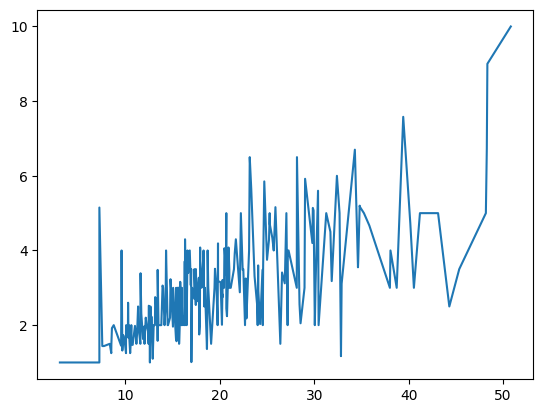

In [8]:
import matplotlib.pyplot as plt
plt.plot(df['total_bill'],df['tip'])

In [16]:
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']
day_to_number = {day: i for i, day in enumerate(days)}

df['day_encoded'] = df['day'].map(day_to_number)

del df['day']


In [17]:
df

,total_bill,tip,sex,smoker,time,size,day_encoded
67,3.07,1.00,Female,Yes,Dinner,1,6
92,5.75,1.00,Female,Yes,Dinner,2,5
111,7.25,1.00,Female,No,Dinner,1,6
172,7.25,5.15,Male,Yes,Dinner,2,0
149,7.51,2.00,Male,No,Lunch,2,4
...,...,...,...,...,...,...,...
182,45.35,3.50,Male,Yes,Dinner,3,0
156,48.17,5.00,Male,No,Dinner,6,0
59,48.27,6.73,Male,No,Dinner,4,6
212,48.33,9.00,Male,No,Dinner,4,6


In [18]:
X = df.drop('tip', axis=1)  
y = df['tip']             

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
categorical_features = ['sex', 'smoker',  'time']
numerical_features=['total_bill']
categorical_transformer = OneHotEncoder()
numerical_transformer= StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Las demás características numéricas se dejan pasar sin cambios
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [31]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['total_bill']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker', 'time'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [33]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 0.9553520567213105
R2: 0.330766957190728
